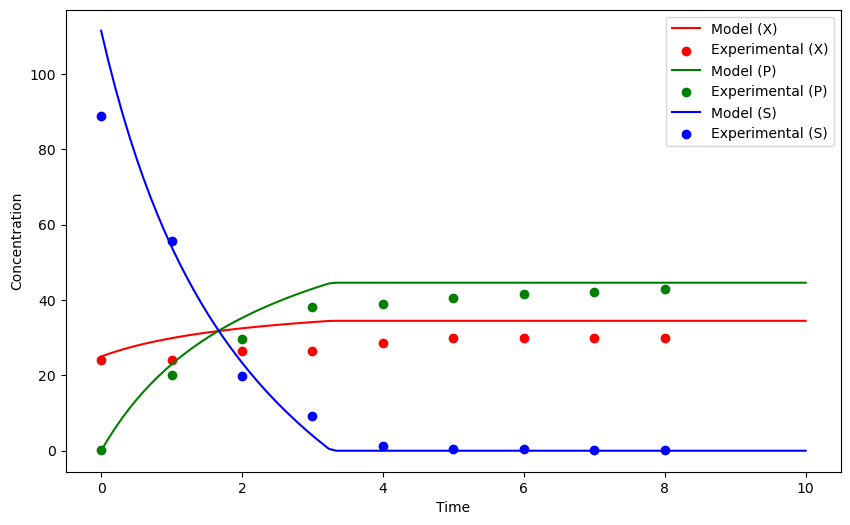

34.48936170212768
44.59999999999999
-3.72034240908779e-26


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

muc = 0.50
Ks = 6.10e-3
Ki = 139.7
Pmax = 94.2
n = 4.12
Yps = 0.40
alpha = 4.70


def lorenz(u, t, muc, Ks, Ki, Pmax, n, Yps, alpha):
    X, P, S = u
    mu = ((muc * S) / (Ks + S + (S**2 / Ki))) * (1 - (P / Pmax))**n
    pi = alpha * mu
    sigma = pi / Yps
    dXdt = mu * X
    dPdt = pi * X
    dSdt = -sigma * X
    return [dXdt, dPdt, dSdt]

u0 = [25, 0, 111.5]
params = (muc, Ks, Ki, Pmax, n, Yps, alpha)

t = np.linspace(0, 10, 100)
sol = odeint(lorenz, u0, t, args=params)

X, P, S = sol[:, 0], sol[:, 1], sol[:, 2]
#experimental data
exp_X = np.array([23.97,24.19,26.450,26.45,28.70,30.05,29.94,30.05,30.05])
exp_P = np.array([0.084,20.056,29.788,38.126,38.859,40.66,41.66,42.14,43.01])
exp_S = np.array([88.87,55.74,19.91,9.32,1.21,0.535,0.535,0.084,0.309])
T = np.array([0,1,2,3,4,5,6,7,8])

plt.figure(figsize=(10, 6))

plt.plot(t, X,color='red', label='Model (X)')
plt.scatter(T, exp_X, color='red', label='Experimental (X)')

plt.plot(t, P,color='green', label='Model (P)')
plt.scatter(T, exp_P, color='green', label='Experimental (P)')

plt.plot(t, S,color='blue', label='Model (S)')
plt.scatter(T, exp_S, color='blue', label='Experimental (S)')

plt.xlabel('Time')
plt.ylabel('Concentration')
plt.legend()
plt.show()

final_X=X[-1]
final_P=P[-1]
final_S=S[-1]

print(final_X)
print(final_P)
print(final_S)

# optimized model

C:\anaconda\Lib\site-packages\scipy\integrate\_odepack_py.py:248: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


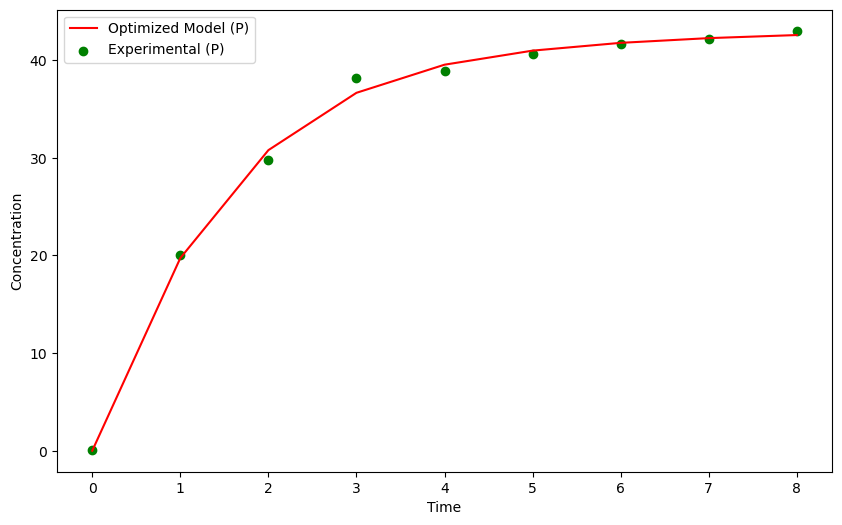

Optimized Parameters: [  1.99179776 168.48400245   2.28238277  50.69797513   2.291676
   0.38897019  26.79507297]


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from scipy.optimize import curve_fit

def lorenz(u, t, muc, Ks, Ki, Pmax, n, Yps, alpha):
    X, P, S = u
    mu = ((muc * S) / (Ks + S + (S**2 / Ki))) * (1 - (P / Pmax))**n
    pi = alpha * mu
    sigma = pi / Yps
    dXdt = mu * X
    dPdt = pi * X
    dSdt = -sigma * X
    return [dXdt, dPdt, dSdt]

exp_X = np.array([23.97, 24.19, 26.450, 26.45, 28.70, 30.05, 29.94, 30.05, 30.05])
exp_P = np.array([0.084, 20.056, 29.788, 38.126, 38.859, 40.66, 41.66, 42.14, 43.01])
exp_S = np.array([88.87, 55.74, 19.91, 9.32, 1.21, 0.535, 0.535, 0.084, 0.309])
T = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8])

t = np.linspace(0, len(exp_P)-1, len(exp_P))

initial_params = (0.50, 6.10e-3, 139.7, 94.2, 4.12, 0.40, 4.70)

def optimize_func(t, muc, Ks, Ki, Pmax, n, Yps, alpha):
    u0 = [25, 0, 111.5]
    params = (muc, Ks, Ki, Pmax, n, Yps, alpha)
    sol = odeint(lorenz, u0, t, args=params)
    return sol[:, 1]  # Return the P values for optimization

optimal_params, covariance = curve_fit(optimize_func, t, exp_P, p0=initial_params)

optimized_sol = odeint(lorenz, u0, t, args=tuple(optimal_params))

plt.figure(figsize=(10, 6))

plt.plot(t, optimized_sol[:, 1], 'r', label='Optimized Model (P)')
plt.scatter(T, exp_P, color='green', label='Experimental (P)')

plt.xlabel('Time')
plt.ylabel('Concentration')
plt.legend()
plt.show()

print("Optimized Parameters:", optimal_params)


# BIFURCATION

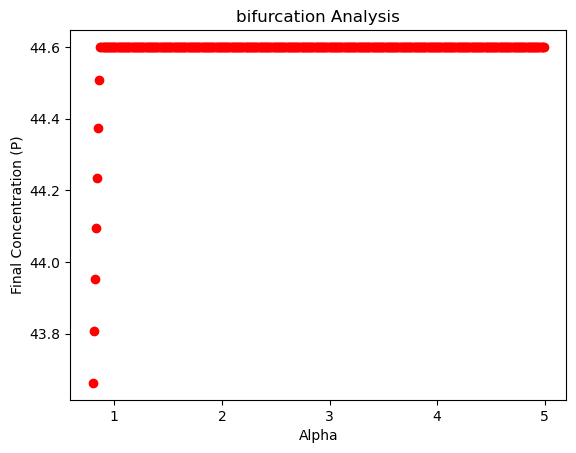

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

muc = 0.50
Ks = 6.10e-3
Ki = 139.7
Pmax = 94.2
n = 4.12
Yps = 0.40

def lorenz(u, t, muc, Ks, Ki, Pmax, n, Yps, alpha):
    X, P, S = u
    mu = ((muc * S) / (Ks + S + (S**2 / Ki))) * (1 - (P / Pmax))**n
    pi = alpha * mu
    sigma = pi / Yps
    dXdt = mu * X
    dPdt = pi * X
    dSdt = -sigma * X
    return [dXdt, dPdt, dSdt]

p = 80
constant_P = []
alpha_values = []

for i in range(p, 500, 1):
    alpha = i / 100.0
    params = (muc, Ks, Ki, Pmax, n, Yps, alpha)
    t = np.linspace(0, 10, 100)
    u0 = [25, 0, 111.5]
    sol = odeint(lorenz, u0, t, args=params)
    X, P, S = sol[:, 0], sol[:, 1], sol[:, 2]
    final_P = P[-1]
    constant_P.append(final_P)
    alpha_values.append(alpha)

plt.plot(alpha_values, constant_P, 'or')
plt.xlabel('Alpha')
plt.ylabel('Final Concentration (P)')
plt.title('bifurcation Analysis')
plt.show()


# sensitivity analysis

44.59999999999999


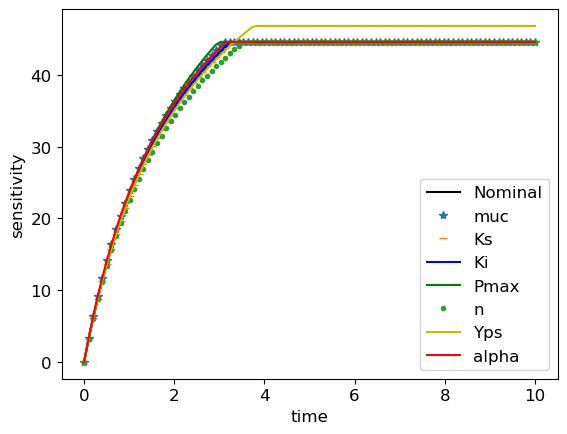

In [21]:
import numpy as np
import math
import matplotlib.pyplot as plt
# This makes the plots appear inside the notebook
%matplotlib inline

from scipy.integrate import odeint

def lorenz(u, t, muc, Ks, Ki, Pmax, n, Yps, alpha):
    X, P, S = u
    mu = ((muc * S) / (Ks + S + (S**2 / Ki))) * (1 - (P / Pmax))**n
    pi = alpha * mu
    sigma = pi / Yps
    dXdt = mu * X
    dPdt = pi * X
    dSdt = -sigma * X
    return [dXdt, dPdt, dSdt]

t = np.linspace(0, 10, 100)
u0 = [25, 0, 111.5]

y = odeint(lorenz, u0, t, args = (0.50,6.10e-3,139.7,94.2,4.12,0.40,4.70))
y1 = odeint(lorenz, u0, t, args = (0.50*1.05,6.10e-3,139.7,94.2,4.12,0.40,4.70))
y2 = odeint(lorenz, u0, t, args = (0.50,6.10e-3*1.05,139.7,94.2,4.12,0.40,4.70))
y3 = odeint(lorenz, u0, t, args = (0.50,6.10e-3,139.7*1.05,94.2,4.12,0.40,4.70))
y4 = odeint(lorenz, u0, t, args = (0.50,6.10e-3,139.7,94.2*1.05,4.12,0.40,4.70))
y5 = odeint(lorenz, u0, t, args = (0.50,6.10e-3,139.7,94.2,4.12*1.05,0.40,4.70))
y6 = odeint(lorenz, u0, t, args = (0.50,6.10e-3,139.7,94.2,4.12,0.40*1.05,4.70))
y7 = odeint(lorenz, u0, t, args = (0.50,6.10e-3,139.7,94.2,4.12,0.40,4.70*1.05))

plt.rcParams.update({'font.size': 12})  # increase the font size
plt.xlabel("time")
plt.ylabel("sensitivity")
plt.plot(t, y[:,1],'k', label = "Nominal");
plt.plot(t, y1[:,1],'*', label = "muc");
plt.plot(t, y2[:,1],'_',  label = "Ks");
plt.plot(t, y3[:,1], 'b', label = "Ki");
plt.plot(t, y4[:,1],'g',  label = "Pmax");
plt.plot(t, y5[:,1],'.',  label = "n");
plt.plot(t, y6[:,1],'y',  label = "Yps");
plt.plot(t, y7[:,1],'r',  label = "alpha");
plt.legend()

print(y[-1,1])

## Global sensitivity

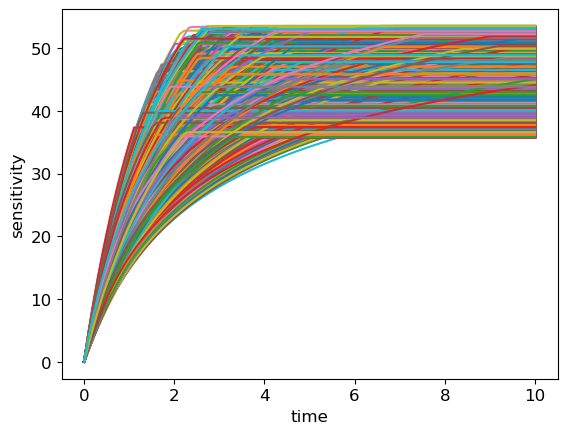

In [14]:
N = 10000;
mum = np.random.uniform(0.50*.8,0.50*1.2,N);
Ks = np.random.uniform(6.10e-3*.8,6.10e-3*1.2,N);
Ki = np.random.uniform(139.7*.8,139.7*1.2,N);
Pmax = np.random.uniform(94.2*.8,94.2*1.2,N);
n = np.random.uniform(4.12*.8,4.12*1.2,N);
Yps = np.random.uniform(0.40*.8,0.40*1.2,N);
alpha = np.random.uniform(4.70*.8,4.70*1.2,N);

P = np.zeros(N);

for m in np.arange(0,N,1):
    output = odeint(lorenz, u0, t, args = (mum[m],Ks[m],Ki[m],Pmax[m],n[m],Yps[m],alpha[m]));
    plt.plot(t,output[:,1]);
    plt.xlabel("time");
    plt.ylabel('sensitivity');
    
P[m]=output[-1,1];

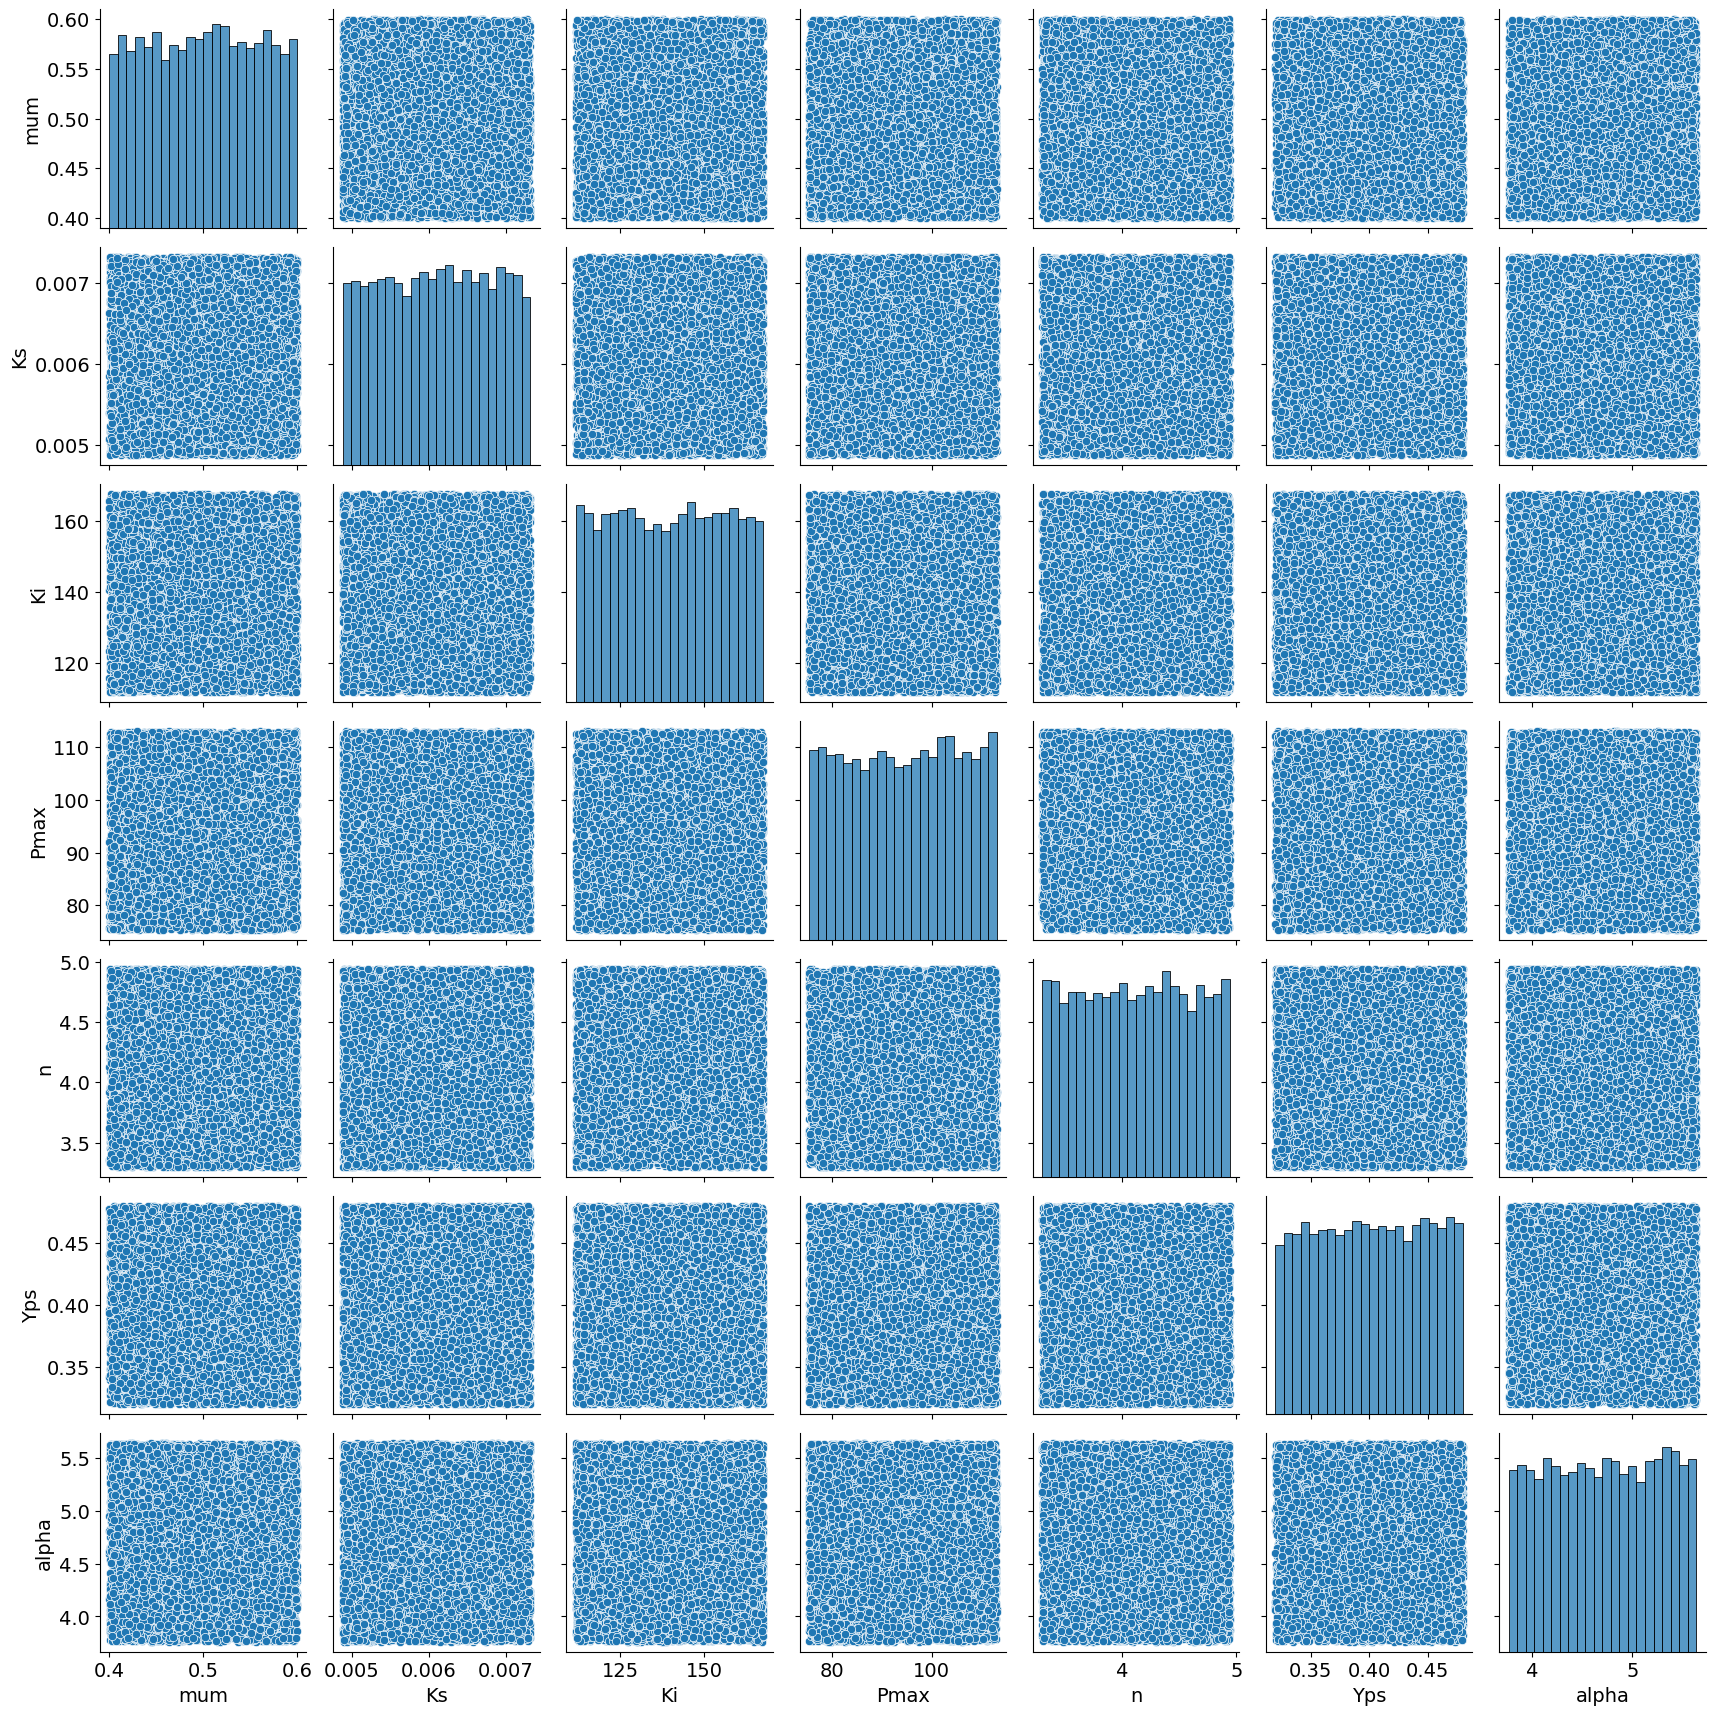

In [7]:
import pandas as pd
import seaborn as sns

tmp = {'mum':mum, 'Ks':Ks,'Ki':Ki,'Pmax':Pmax,'n':n,'Yps':Yps,'alpha':alpha};
df = pd.DataFrame(tmp);
del(tmp)

sns.pairplot(df)
20
plt.show()